<a href="https://colab.research.google.com/github/Rufaidah44/Classification_Models/blob/main/Clustering_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import log, dot, e
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning/GPA_Dataset2.csv')
df.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [3]:
#drop the last column
#df.drop(columns=['tepat'], axis=0, inplace=True )

In [4]:
df.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [5]:
df.rename(columns={"ip1":"GPA_1", "ip2":"GPA_2", "ip3":"GPA_3", "ip4":"GPA_4","tepat": "graduated_on_time?"}, inplace=True)
df.columns

Index(['GPA_1', 'GPA_2', 'GPA_3', 'GPA_4', 'graduated_on_time?'], dtype='object')

In [6]:
df.head()

,GPA_1,GPA_2,GPA_3,GPA_4,graduated_on_time?
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [7]:
#transfer values to 0 or 1
from sklearn.preprocessing import LabelEncoder
# encoder last column 
enc= LabelEncoder()
df.iloc[:,[-1]]= df.iloc[:,[-1]].apply(enc.fit_transform).astype(float)
df = df.astype(float)

In [8]:
df.describe()

,GPA_1,GPA_2,GPA_3,GPA_4,graduated_on_time?
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,3.056259,3.048379,3.137631,3.152768,0.670823
std,0.403791,0.523141,0.417795,0.476645,0.470501
min,0.830000,0.950000,0.550000,0.900000,0.000000
25%,2.880000,2.920000,3.010000,3.060000,0.000000
50%,3.120000,3.190000,3.220000,3.280000,1.000000
75%,3.320000,3.350000,3.390000,3.450000,1.000000
max,3.860000,3.770000,3.820000,3.800000,1.000000


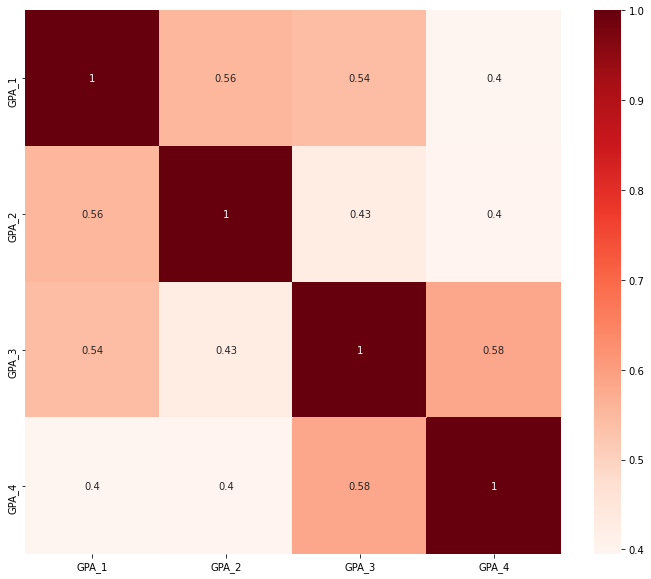

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.iloc[:,:4].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f5f420ef0>,
      dtype=object)

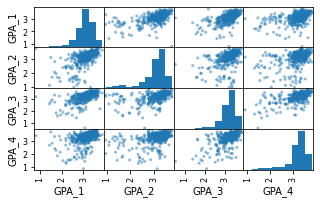

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,0:4], figsize=(5,3))

In [11]:
#choose features without label
X = df.iloc[:,:4].values
y = df.iloc[:,-1].values


#Project data to lower dimension using PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

#create a dataframe combining the low dimension data and to be used for visualization
low_dim_data = {
        'X1': X[:,0],
        'X2': X[:,1],
        'label': y}
low_dim_df = pd.DataFrame(low_dim_data, columns = ['X1', 'X2', 'label'])


In [12]:
X

array([[ 2.37846038e+00,  6.09079198e-01],
       [ 2.71385512e+00,  2.14089927e-01],
       [ 1.69938921e-01,  6.05805898e-02],
       [ 1.40860161e+00,  3.84713241e-01],
       [ 1.07379427e-03,  7.71680208e-02],
       [-1.83726055e-01,  3.85609026e-01],
       [ 6.46910394e-01, -2.55905405e-01],
       [ 1.75583889e-01,  4.19459441e-01],
       [ 9.81160282e-01,  2.56585616e-01],
       [ 1.63020462e-01, -2.87837953e-01],
       [ 1.02162500e+00, -1.21866134e+00],
       [ 9.62223717e-01,  2.72803186e-01],
       [-5.12150475e-01, -1.28351152e-01],
       [ 8.52762106e-02, -2.90024798e-01],
       [-2.19322393e-01,  1.85006593e-01],
       [ 1.29659961e+00,  8.69270712e-01],
       [ 2.87345655e-01, -1.80858685e-03],
       [ 2.55000242e-01,  3.54938906e-01],
       [ 4.08789656e-01, -1.24984218e-01],
       [ 3.72648377e-01, -1.80311865e-01],
       [-2.34432979e-02, -1.03625319e-01],
       [ 2.24298713e-01, -1.54067178e-01],
       [ 1.37708994e-01,  1.55210322e-01],
       [ 2.

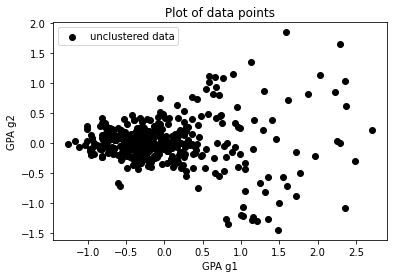

In [13]:
#plot the data after reduction
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('GPA g1')
plt.ylabel('GPA g2')
plt.legend()
plt.title('Plot of data points')
plt.show()

In [14]:
#devide the data to m and n 
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2

#no of iterations 
n_iter=100

#choose no of k 
K=4

#Initialize the centroids randomly
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]


Output={}

In [15]:

for i in range(n_iter):
     #step 2.a
     #Calculate euclidian distance from the centroid and 
     #assign the cluster based on the minimal distance
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
     #regroup the data points based on the cluster index
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

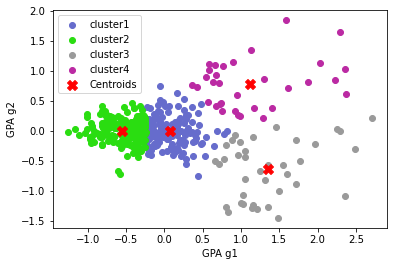

In [16]:
color=['#666ccc', '#2add11','#9a9a9a','#bb2aa3','#3789aa','#1c3f44','orange']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6', 'cluster7']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='red',label='Centroids', marker='X')
plt.xlabel('GPA g1')
plt.ylabel('GPA g2')
plt.legend()
plt.show()

In [17]:
from scipy.stats import multivariate_normal
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition

%matplotlib inline

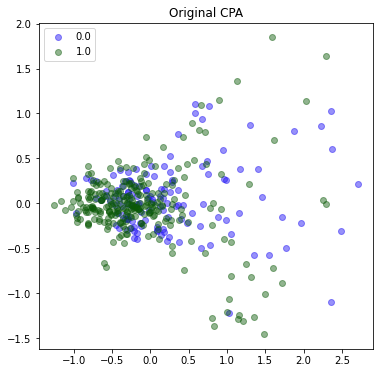

In [18]:
# Create Figure
fig, (axs) = plt.subplots(1,1, figsize = (6,6))

# Plot each group in each dataset as unique olor
for ax, low_dim_df in zip([axs], [low_dim_df]):
    ax.set_title('Original CPA')
    for cat, col in zip(low_dim_df['label'].unique(), ['#190BF5', '#0B5A07']):
        ax.scatter(low_dim_df[low_dim_df.label == cat].X1, low_dim_df[low_dim_df.label == cat].X2, c = col, label = cat, alpha = .45)
    ax.legend()

In [19]:
# Implement K-means ++ to initialize centers
def pick_cluster_centers(points, num_clusters = 4):
    # Create List to store clusters
    clusters = []
    # Save list of cluster indicies
    arr_idx = np.arange(len(points))
    # Choose first cluster; append to list
    clusters.append( (points[np.random.choice(arr_idx)],1.0 / num_clusters,np.identity(points.shape[1], dtype=np.float64)))
    # Define function to calculate squared distance
    def dist_sq(x): return np.linalg.norm(x)**2
    c_dist = None
    # Add Clusters until reaching "num_clusters"
    while len(clusters) < num_clusters:
        # Calculate distance between latest cluster and rest of points
        new_dist = np.apply_along_axis(dist_sq, 1, points - clusters[-1][0]).reshape(-1,1)
        
        # Add to distance array - First check to see if distance matrix exists
        if type(c_dist) == type(None):
            c_dist = new_dist
        else:
            c_dist = np.concatenate([c_dist, new_dist], axis = 1)
            
        # Calculate probability by finding shortest distance, then normalizing
        c_prob = np.apply_along_axis(np.min, 1, c_dist)
        c_prob = c_prob / c_prob.sum()
        # Draw new cluster according to probability
        clusters.append((points[np.random.choice(arr_idx, p = c_prob)],1.0 / num_clusters,np.identity(points.shape[1], dtype=np.float64)))
    return np.array(clusters)

In [20]:
def assign_clusters_GMM(points, clusters):
    
    # Create function that creates a function which will
    # calculate the pdf given a mu and sigma, then multiply by pi
    def pdf_calc_func(mu, pi, Sigma):
        return lambda x: pi*stats.multivariate_normal(mu, Sigma).pdf(x)
    # Create list for saving weights
    clust_weights = []
    # For each cluster
    for c in clusters:
        # Create the custom pdf function
        
        pdf = pdf_calc_func(*c)
        # Apply to all the points
        clust_weights.append(np.apply_along_axis(pdf, 1, points).reshape(-1,1))
    # Combine all points
    clust_weights = np.concatenate(clust_weights, axis = 1)
    # Define normalizatino function and normalize
    def norm_clust_weights(x):
        return [n/np.sum(x) for n in x]
    cluster_assignments = np.apply_along_axis(norm_clust_weights, 1, clust_weights)
    
    return cluster_assignments,clust_weights

In [21]:
def update_clusters_GMM(points, cluster_weights):
    
    # Create list for clusters
    new_clusts = []
    # For each cluster
    for c in cluster_weights.T:
        n_k = np.sum(c) # Calculate n
        pi_k = n_k / len(points) # calculate pi
        # Calculate mu
        mu_k = np.apply_along_axis(np.sum,0,points * c.reshape(-1,1)) / n_k
        # Initialize Sigma
        Sigma_k = 0
        # For every weight and point
        for cw, p in zip(c, points):
            diff = p - mu_k # Find Difference
            # Dot Product times weight
            Sigma_k += cw * np.matmul(diff.reshape(-1,1), diff.reshape(1,-1))
        # Normalize Sigma
        Sigma_k = Sigma_k / n_k
        # Create cluster tuple, and add to list
        new_c = (mu_k, pi_k, Sigma_k)
        new_clusts.append(new_c)
    return new_clusts

In [22]:
def get_log_likelihood(likelihood):
    
    log_likelihoods = np.sum(likelihood)
    return np.log(log_likelihoods)

In [23]:
# Create function that will create clustering functions
def create_cluster_func(assign_func, update_func, threshold_func, assign_args = {}):
    
    def cluster(points, centroids, max_iter = 100, stop_threshold = .0001):
        cluster_means_diffs = []
        log_likelihoods = []
        history = []
        cluster_assign_history = []
        for i in range(max_iter):
            old_centroids = centroids
            
            cluster_weights,likelihood = assign_func(points, centroids, **assign_args)
            
            log_likelihood = get_log_likelihood(likelihood)
            log_likelihoods.append(log_likelihood)
            centroids = update_func(points, cluster_weights)
            
            clusters_snapshot = []
        
            # This is just for our later use in the graphs
            for cluster in centroids:
                
                clusters_snapshot.append({
                    'mu_k': cluster[0],
                    'cov_k': cluster[2]
                })

            history.append(clusters_snapshot)
            cluster_assign_history.append(cluster_weights)
            
            status,metric = threshold_func(centroids, old_centroids, stop_threshold)
            cluster_means_diffs.append(metric)
            print('Iteration',i + 1,'Likelihood: ', log_likelihood)
            
            if status:
                break
        
        return (centroids,cluster_weights,cluster_means_diffs,log_likelihoods,history,cluster_assign_history)
    return cluster

# Create functions that test for convergence
def basic_threshold_test(centroids, old_centroids, stop_threshold):
    
    for n, o in zip(centroids, old_centroids):
        #print(n,o)
        metric = np.linalg.norm(n-o)
        if metric > stop_threshold:
            return (False,metric)
    return (True,metric)

# Create functions that test for convergence
def GMM_threshold_test(centroids, old_centroids, stop_threshold):
    for np, op in zip(centroids, old_centroids):
        status,metric = basic_threshold_test(np,op,stop_threshold)
        if not status:
            return (status,metric)
    return (status,metric)

In [24]:
### Creating actual functions for clustering
cluster_GMM = create_cluster_func(assign_clusters_GMM,
                                      update_clusters_GMM,
                                      GMM_threshold_test)

In [25]:
def train(df,clusters = 4,max_iter = 100):
    # Pull out point data
        points = df.iloc[:,:4].values
        
        # Pick random initial centers
        init_cents = pick_cluster_centers(points, clusters)
        
        
        # Calculate centers from custom function
        cents,cluster_assignments,cluster_means_diffs,log_likelihoods,history,cluster_assign_history = cluster_GMM(points ,init_cents,max_iter)
        
        return (cents,cluster_assignments,cluster_means_diffs,log_likelihoods,history,cluster_assign_history)

In [26]:
%%time
cents,cluster_assignments,cluster_means_diffs,log_likelihoods,history,cluster_assign_history = train(df,4, 50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Iteration 1 Likelihood:  1.4930678659789092
Iteration 2 Likelihood:  5.68178084879846
Iteration 3 Likelihood:  6.377775866933777
Iteration 4 Likelihood:  6.589900978737521
Iteration 5 Likelihood:  6.659616606705949
Iteration 6 Likelihood:  6.700292027918729
Iteration 7 Likelihood:  6.727791591453088
Iteration 8 Likelihood:  6.744770427664424
Iteration 9 Likelihood:  6.754188676549834
Iteration 10 Likelihood:  6.7590735528546935
Iteration 11 Likelihood:  6.761588424450988
Iteration 12 Likelihood:  6.762994476766388
Iteration 13 Likelihood:  6.763879767922255
Iteration 14 Likelihood:  6.764515207732096
Iteration 15 Likelihood:  6.7650426523593685
Iteration 16 Likelihood:  6.765529035610866
Iteration 17 Likelihood:  6.765997209212492
Iteration 18 Likelihood:  6.766451983876636
Iteration 19 Likelihood:  6.766892164988005
Iteration 20 Likelihood:  6.767314578638305
Iteration 21 Likelihood:  6.767715620196357
Iteration 22 Likelihood:  6.768092029018962
Iteration 23 Likelihood:  6.76844127943

In [27]:
# Visualization function for GMM
from sklearn.mixture import GaussianMixture
from matplotlib.colors import to_hex, to_rgb

def plot_GMM(df,low_dim_df,cents,cluster_assignments,clusters = 4):
    
    
    # Create figure
    fig, (axs) = plt.subplots(1,2, figsize = (12,6))
    
    # Go thorugh all data sets 
    for ax, df in zip([axs], [df]):
        
        #Section 1
        # Pull out point data
        points = df.iloc[:,:4].values
        
        
        #Calculate centers from sklearn
        GMM = GaussianMixture(clusters, n_init=1,covariance_type='diag').fit(points)
        cluster_assignments_sk = GMM.predict_proba(points)
        
        
        
        #section 2
        
        #Calculate centers of the low dimension data projection
        low_dim_cents_custom = update_clusters_GMM(low_dim_df.iloc[:,:2].values, cluster_assignments)
        
        
        def to_cluster_format(index):
            zeros_clust = np.array([0,0,0,0])
            zeros_clust[index:index+1] = 1
            
            return zeros_clust
            
        low_dim_cents_sk = update_clusters_GMM(low_dim_df.iloc[:,:2].values, cluster_assignments_sk)
        
        
        #calculate the actual centers of our GMM clustering with sklearn
        cent_sk = GMM.means_
        
        #assign colors according to probabilities
        def find_hex(p, colors):
            p = p.reshape(-1,1)
            return to_hex(np.sum(p*colors, axis=0))
        
        colors = ['#190BF5', '#0B5A07', '#DA8DB9','orange']#[:clusters]
        colors = [np.array(to_rgb(c)) for c in colors]
        colors = np.array(colors)
        
        plot_colors = [find_hex(p,colors) for p in cluster_assignments]
        
        
        # Plot each distribution in different color
        axs[0].set_title('Original CPA')
        for cat, col in zip(low_dim_df['label'].unique(), ['#190BF5', '#0B5A07', '#DA8DB9',"orange"]):
                axs[0].scatter(low_dim_df[low_dim_df.label == cat].X1, low_dim_df[low_dim_df.label == cat].X2, 
                           label = None, c = col, alpha = .45)

        axs[1].set_title('Cluster Labeled CPA')
        axs[1].scatter(low_dim_df.X1, low_dim_df.X2, label = None, c = plot_colors, alpha = .45)
        # Plot Calculated centers
        
        only_low_dim_cents_custom = np.array([ mu for mu,pi,sigma in low_dim_cents_custom])
        only_low_dim_cents_sk = np.array([ mu for (mu,pi,sigma) in low_dim_cents_sk])
        
        axs[1].scatter(only_low_dim_cents_custom[:,0], only_low_dim_cents_custom[:,1], c = 'k', marker = 'x', label = 'Custom', s = 70)
        axs[1].scatter(only_low_dim_cents_sk[:,0], only_low_dim_cents_sk[:,1], c = 'r', marker = '+', label = 'sklearn', s = 70)
        
        # Add legend
        axs[1].legend()

CPU times: user 113 ms, sys: 5.13 ms, total: 118 ms
Wall time: 120 ms


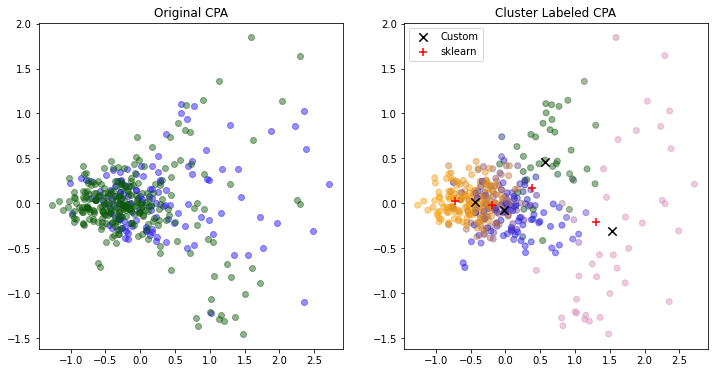

In [28]:
%%time
plot_GMM(df,low_dim_df,cents,cluster_assignments,4)